In [1]:
from os import walk
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
from os import walk

mypath_ads  = [
    "../data/res/ads/dantri",
    "../data/res/ads/thanhnien",
    "../data/res/ads/tuoitre",
    "../data/res/ads/vietnamnet",
]
mypath_non_ads = [
    "../data/res/non_ads/dantri",
    "../data/res/non_ads/thanhnien"
]
def get_text_file(path_arr):
    filename = []
    for path in path_arr:
        f = []
        for (dirpath, dirnames, filenames) in walk(path):
            f.extend(filenames)
            break
        filename+=[f"{path[1:]}/{i}" for i in f if "txt" in i]
    return filename

In [3]:
ads = get_text_file(mypath_ads)
non_ads = get_text_file(mypath_non_ads)

Save path of text file

In [4]:
with open("../data/res/ads/link.txt", 'w') as f:
    l = map(lambda x: x+"\n", ads)
    f.writelines(l)
with open("../data/res/non_ads/link.txt", 'w') as f:
    l = map(lambda x: x+"\n", non_ads)
    f.writelines(l)

Thống kê đánh giá dữ liệu

In [5]:
ads_link =  [i[:-1] for i in open("../data/res/ads/link.txt", 'r').readlines()]
non_ads_link =  [i[:-1] for i in open("../data/res/non_ads/link.txt", 'r').readlines()]

In [6]:
ads_data = []
for link in ads_link:
    ads_data.append([i[:-1] for i in open("."+ link,'r').readlines() if i !="\n"])
non_ads_data = []
for link in non_ads_link:
    non_ads_data.append([i[:-1] for i in open("."+ link,'r').readlines() if i !="\n"])
# ads_data = np.array(ads_data)
# non_ads_data = np.array(non_ads_data)


In [7]:
len_ads_data = np.array([len(i) for i in ads_data])
len_non_ads_data = np.array([len(i) for i in non_ads_data])
bb_ads = [sum(len_ads_data>i) for i in range(10,40)]
bb_non_ads = [sum(len_non_ads_data>i) for i in range(10,40)]


Text(0, 0.5, 'number of image')

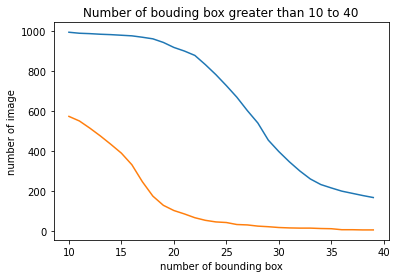

In [60]:
plt.plot(range(10,40),bb_ads,label="demo",)
plt.plot(range(10,40),bb_non_ads)
plt.title("Number of bouding box greater than 10 to 40")
plt.xlabel("number of bounding box")
plt.ylabel("number of image")

Get 10 bouding box - 5 greatest and 5 smallest

Get height and width of image

In [9]:
hw_ads = [PIL.Image.open("."+path[:-3] + "png").size for path in ads_link]
hw_non_ads = [PIL.Image.open("." + path[:-3] + "png").size for path in non_ads_link]

Set weight of images

$$(H_b((|H_cb-H_c|+1)(|W_cb-W_c|+1)))/W_b$$

In [61]:
def extract_info(arr):
    arr = [int(i) for i in arr.split(",")[:-1]]
    h_b = arr[-1]-arr[1]
    w_b = arr[2] - arr[0]
    h_cb = (arr[-1]+arr[1])//2
    w_cb = (arr[2]+arr[0])//2
    return h_b,w_b,h_cb,w_cb

In [62]:
extract_info(ads_data[0][0])

(19, 64, 393, 544)

In [132]:
n_att = 10
w_ads = []
for bbs,hw in zip(ads_data,hw_ads):
    if len(bbs) <n_att:
        continue
    temp = []
    for bb in bbs:
        h_b,w_b,h_cb,w_cb =extract_info(bb)
        weight = (h_b*(abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))/w_b
        temp.append(weight)
    temp = sorted(temp)
    w_ads.append(temp[-n_att:])
    # w_ads.append(temp[:5] + temp[-5:])
w_non_ads = []
for bbs,hw in zip(non_ads_data,hw_non_ads):
    if len(bbs) <n_att:
        continue
    temp = []
    for bb in bbs:
        h_b,w_b,h_cb,w_cb =extract_info(bb)
        weight = (h_b*(abs(h_cb-hw[1])+1)*(abs(w_cb-hw[0])+1))/w_b
        temp.append(weight)
    temp = sorted(temp)
    w_non_ads.append(temp[-n_att:])
    # w_non_ads.append(temp[:5] + temp[-5:])


In [133]:
w_ads

[[28390.145833333332,
  31139.772727272728,
  32833.9375,
  35107.72222222222,
  71987.4375,
  78497.8125,
  115830.0,
  126177.85714285714,
  144964.3125,
  183425.0],
 [36752.760416666664,
  43476.375,
  48391.6,
  58813.0,
  59946.796875,
  78286.25,
  79209.375,
  94674.25,
  135015.83333333334,
  177611.11111111112],
 [29797.8125,
  30723.328125,
  30936.28125,
  40123.6875,
  40849.21875,
  43371.42857142857,
  61116.0625,
  70055.71428571429,
  154698.95833333334,
  177611.11111111112],
 [24517.9921875,
  25421.10576923077,
  26745.46875,
  28125.0,
  29655.113636363636,
  37651.875,
  69426.0,
  157483.625,
  183425.0,
  207933.375],
 [48288.75,
  50370.78125,
  56774.666666666664,
  62650.0,
  78286.25,
  93636.5625,
  152033.0,
  183425.0,
  186212.25,
  195471.0],
 [29621.7,
  33056.1,
  35008.3125,
  45971.625,
  46620.0,
  80422.76785714286,
  86846.625,
  113400.0,
  183425.0,
  218411.4375],
 [44843.166666666664,
  45002.208333333336,
  46167.604166666664,
  47088.0,
  4

In [134]:
X = w_ads + w_non_ads
y = [0]*len(w_ads) + [1]*len(w_non_ads)


In [137]:
len(w_non_ads)

585

In [138]:
from keras.models import Sequential
from keras.layers import Dense

In [139]:
# define the keras model
model =Sequential()
model.add(Dense(16, input_dim=n_att, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [142]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
model.fit(X,y,epochs=1000,batch_size=10)

Epoch 1/1000
158/158 [==============================] - 1s 1ms/step - loss: 820.4936 - accuracy: 0.6297
Epoch 2/1000
158/158 [==============================] - 0s 1ms/step - loss: 19.5232 - accuracy: 0.4867
Epoch 3/1000
158/158 [==============================] - 0s 1ms/step - loss: 2.0589 - accuracy: 0.3741
Epoch 4/1000
158/158 [==============================] - 0s 940us/step - loss: 0.9583 - accuracy: 0.3703
Epoch 5/1000
158/158 [==============================] - 0s 1ms/step - loss: 0.7510 - accuracy: 0.6165
Epoch 6/1000
158/158 [==============================] - 0s 985us/step - loss: 0.7207 - accuracy: 0.6297
Epoch 7/1000
158/158 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.6297
Epoch 8/1000
158/158 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6297
Epoch 9/1000
158/158 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6297
Epoch 10/1000
158/158 [==============================] - 0s 976us/step - lo

In [129]:
predictions = model.predict(X)
# summarize the first 5 cases
# for i in range(5):
# 	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

In [130]:
sum(predictions > 0.5)

array([0])

Using SVM

In [157]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.metrics as metrics

In [158]:
X_train , X_test, y_train, y_test = train_test_split(X,y)

In [159]:
clf = SVC(C=1.0, kernel='rbf').fit(X_train,y_train)

In [160]:
len(X_train)

1185

In [161]:
y_pred = clf.predict(X_test)

In [162]:
metrics.confusion_matrix(y_test,y_pred)

array([[217,  35],
       [ 22, 121]], dtype=int64)

In [163]:
accuracy = 0
for i in range(len(y_pred)):
    accuracy += y_pred[i] == y_test[i]
print("accuracy: {}/{}".format(accuracy, len(y_pred)))

accuracy: 338/395
